In [153]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

In [154]:
def phase(complex_number): # np.angle() might do the same thing?
    complex_number = np.array(complex_number)
    is_non_zero = complex_number != 0 # np.arctan2() considers 0 to have a phase of 0 whereas it should be undefined.
    return np.arctan2(complex_number.imag, complex_number.real, out= np.full_like(complex_number, np.nan, dtype= np.float64), where= is_non_zero)

def generate_random_phases(number_of_phases, FWHM= 2*np.pi, distrobution= "uniform"):
    if distrobution == "uniform":
        random_numbers = np.random.rand(number_of_phases)
        random_phases = FWHM/2 *(2*random_numbers -1)
    elif distrobution in ["normal", "gaussian"]:
        sigma = FWHM *(8*np.log(2))**-0.5
        random_numbers = np.random.normal(0, sigma, number_of_phases)
        random_phases = random_numbers -np.array(random_numbers /np.pi).astype(int)*np.pi # find the remainder TOWARDS ZERO. Python's % remainder operator finds the remainder towards -inf which means that it is always positive.
    return random_phases

In [155]:
######## SIMPLE COSINE WAVE ##########

wavelengths = [30,40,50] #pixels
number_of_pixels = 1000

wavelengths = np.array(wavelengths)
wavenumbers = 2*np.pi/wavelengths #angular wavenumber in rad/pixel

x = np.arange(number_of_pixels) -number_of_pixels//2
x = np.tile(x, (len(wavelengths), 1))
y = np.cos(wavenumbers*x.T).T

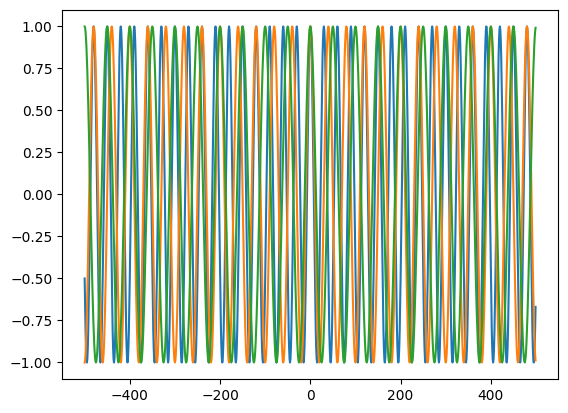

In [156]:
[plt.plot(x[n], y[n]) for n in range(len(wavelengths))]
plt.show()

In [157]:
########## ADD UNIFORM RANDOM NOISE TO THE PHASE ############

number_of_phases_per_wave = 10
FWHM = 2*np.pi
distrobution = "uniform"

number_of_phases = number_of_phases_per_wave *len(wavelengths)

random_phases = generate_random_phases(number_of_phases, FWHM= FWHM, distrobution= distrobution)

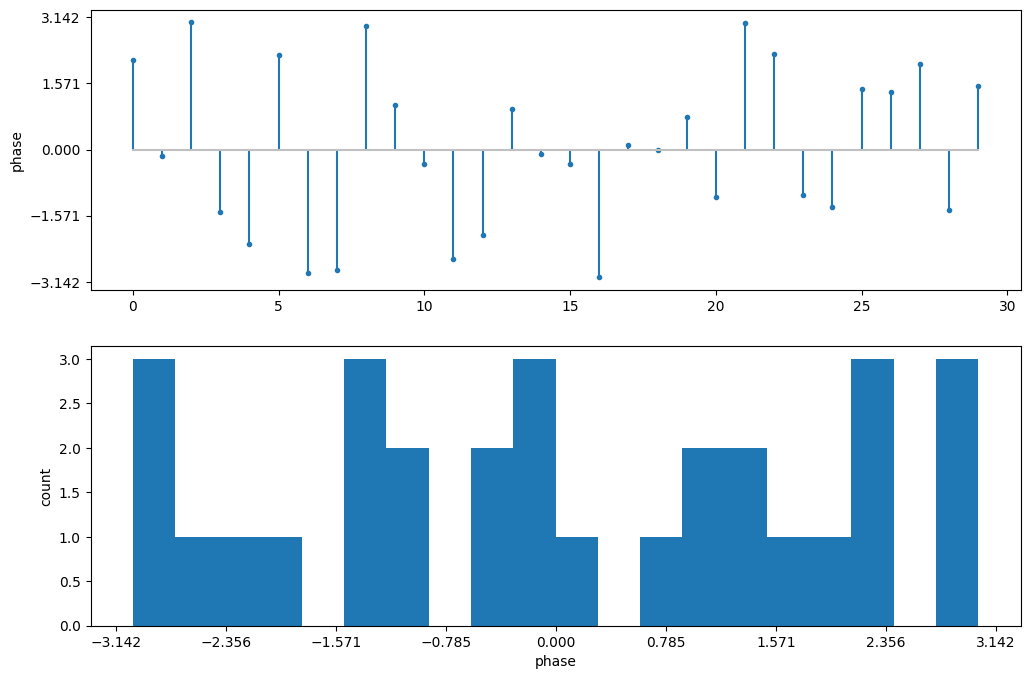

In [158]:
fig, axs = plt.subplots(2, 1, figsize = (12,8))

axs[0].stem(random_phases, markerfmt =".", basefmt= "silver")
axs[0].set(ylabel= "phase", yticks= np.arange(-1,1.5,0.5)*np.pi)

axs[1].hist(random_phases, bins= 20)
axs[1].set(xlabel= "phase", xticks= np.arange(-1,1.25,0.25)*np.pi, ylabel= "count")

plt.show()

In [159]:
######## SHIFT WAVE BY RANDOM PHASE ###########

wavenumbers = np.repeat(wavenumbers, number_of_phases/len(wavenumbers))

x = np.arange(number_of_pixels) -number_of_pixels//2
x_stacked = np.vstack([x]*number_of_phases)

y_stacked = np.cos(wavenumbers*x_stacked.T + random_phases).T
mean_y = np.mean(y_stacked, axis= 0)

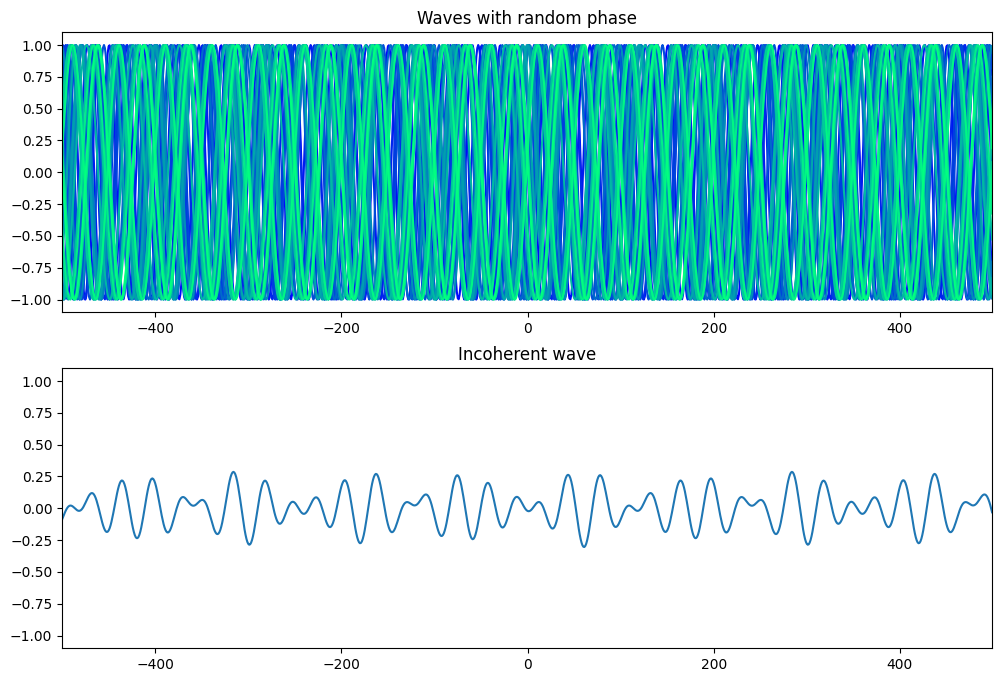

In [160]:
colourmap = plt.get_cmap('winter')
colourvalue = np.linspace(0, 1, number_of_phases)
colours = [colourmap(value) for value in colourvalue]

curves = []
for xs, ys in zip(x_stacked, y_stacked):
    curve = [[x_value, y_value] for x_value, y_value in zip(xs, ys)]
    curves.append(curve)
line_collection = LineCollection(curves, colors= colours) #Pros of LineCollections: No need to iterate over hundreds of lines. Can add a list of colors. Cons of LineCollections: plt can't automatically find limits. Awful data structure `curves = [curve0, curve1, [coord0, coord1, [x2, y2], [x3, y3]]]`

fig, axs = plt.subplots(2, 1, figsize= (12,8))

axs[0].add_collection(line_collection)
axs[0].set(xlim= (x.min(), x.max()), ylim= (1.1*y.min(), 1.1*y.max()), title= "Waves with random phase")

axs[1].plot(x, mean_y)
axs[1].set(xlim= (x.min(), x.max()), ylim= axs[0].get_ylim(), title= "Incoherent wave")

plt.show()

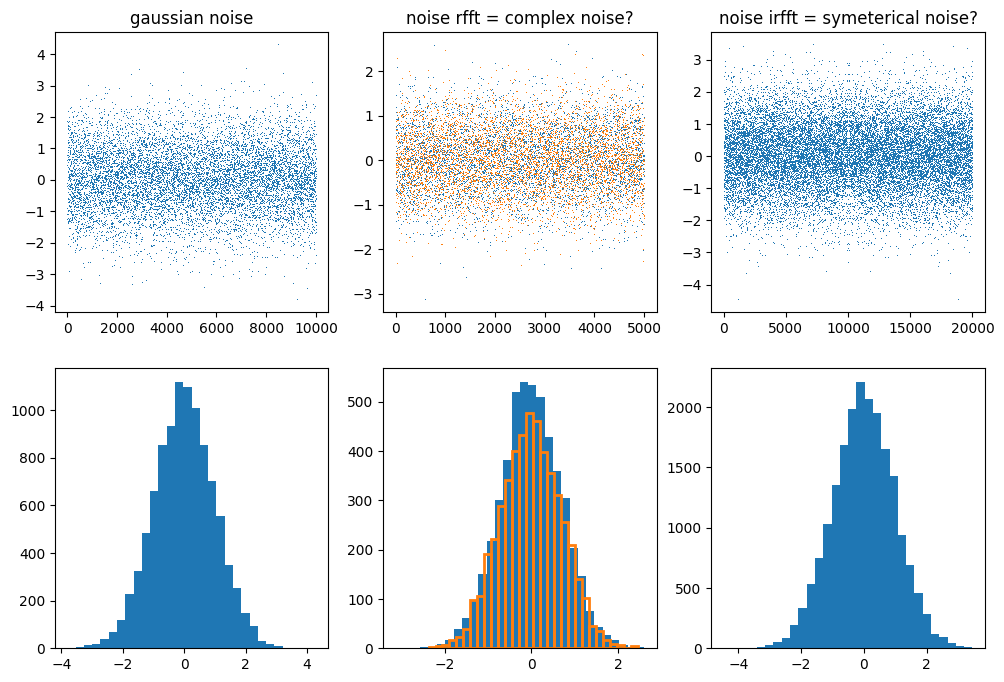

In [161]:
noise = np.random.normal(0, 1, 10000)

noise_fft = np.fft.rfft(noise, norm= "ortho")
noise_ifft = np.fft.irfft(noise, norm= "ortho")

fig, axs = plt.subplots(2,3, figsize= (12, 8))
axs = axs.flatten()

axs[0].plot(noise, linestyle= "None", marker= ",")
axs[0].set(title= "gaussian noise")
axs[1].plot(noise_fft.real, linestyle= "None", marker= ",")
axs[1].plot(noise_fft.imag, linestyle= "None", marker= ",")
axs[1].set(title= "noise rfft = complex noise?")
axs[2].plot(noise_ifft, linestyle= "None", marker= ",")
axs[2].set(title= "noise irfft = symeterical noise?")

axs[3].hist(noise, bins= 30)
axs[4].hist(noise_fft.real, bins= 30)
axs[4].hist(noise_fft.imag, bins= 30, facecolor= "None", edgecolor= "tab:orange", linewidth= 2)
axs[5].hist(noise_ifft, bins= 30)

plt.show()